In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Iris.csv")

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Encoding the categorical column
dataset = dataset.replace({"Species":  {"Iris-setosa":1,"Iris-versicolor":2, "Iris-virginica":3}})

In [6]:
#Visualize the new dataset
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


Text(0.5, 1.0, 'Correlation On iris Classes')

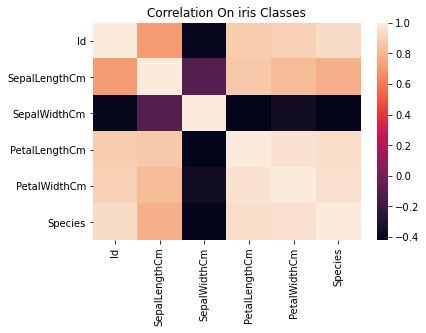

In [9]:
plt.figure(1)
sns.heatmap(dataset.corr())
plt.title('Correlation On iris Classes')

In [10]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
#Create the SVM model
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
#Fit the model for the data

classifier.fit(X_train, y_train)

#Make the prediction
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
Accuracy: 100.00 %
